In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random


In [56]:
random.uniform(0, 1 + 2)

2.7817296833729626

In [79]:
def get_dbt1(N, scale=1.0): 
    x = random.choice([0,1], size=N)
    y = random.exponential(scale=scale, size=N)
    return y * (-1)**x

def get_dbt2(N, scale1=1.01, scale2=0.99): 
    #scale1 = negative side, scale2 = positive side. 
    V = scale1 + scale2 
    dbt = [] 
    for _ in range(N):
        z = random.uniform(0, V)
        dbt.append((-1)*random.exponential(scale=scale1) if z < scale1 else random.exponential(scale=scale2))
    return np.array(dbt)

def boot_fnc(dbt, fnc, N=1000):
    results = [] 
    for i in range(N): 
        results.append(fnc(np.random.choice(dbt,len(dbt), replace=True)))
    return results

In [120]:
N = int(1e4)
dbt1 = get_dbt1(N, scale=1.0) 
dbt2 = get_dbt2(N, scale1=6, scale2=0.5)
X1 = boot_fnc(dbt1, np.median, N=1000)
X2 = boot_fnc(dbt2, np.median, N=1000)

width1: 0.011016959771295614
width2: 0.057575484278714555
-4.226077381958487


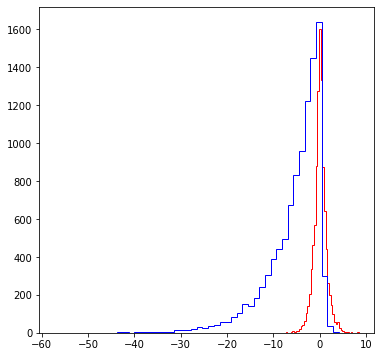

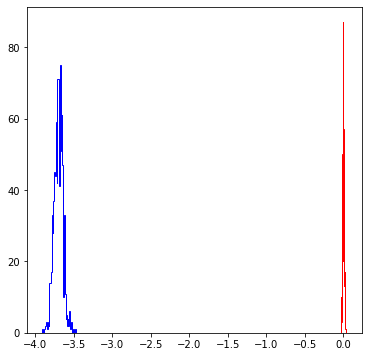

In [121]:
plt.figure(figsize=(6,6))
plt.hist(dbt1, bins=50, color='r', histtype='step')
plt.hist(dbt2, bins=50, color='b', histtype='step')

plt.figure(figsize=(6,6))
plt.hist(X1, bins=50, color='r', histtype='step');
plt.hist(X2, bins=50, color='b', histtype='step');
print('width1:', np.std(X1))
print('width2:', np.std(X2))
print( (np.std(X1)-np.std(X2))/np.std(X1))